<a href="https://colab.research.google.com/github/aryansinghsisodia3/BostonHousing-Dataset/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Boston Housing Dataset

Using Boston Housing dataset (sklearn.datasets.load_boston)

*Another BostonHousing Dataset is being ussed from Github since original dataset was discontinued after version 1.2 of sklearn* -
[BostonHousing.csv](https://gist.github.com/nnbphuong/def91b5553736764e8e08f6255390f37)

Load and preprocess the dataset after finding the best attributes

1.   Split into training and test sets.
2.   Normalize/standardize the features if required.

Apply Multiple Linear Regression (MLR) to predict house prices.

1.   Report the Mean Squared Error (MSE) and Adjusted R² score on the test set.

Apply K-Nearest Neighbors Regression (KNN Regression) with different values of k (1–15).

1.   Plot test set accuracy/error vs. k.
2.   Report the best performance (lowest MSE).

Compare the performance of MLR vs. KNN Regression.

1.   Which performs better on this dataset?
2.   Give a short explanation.


In [11]:
import pandas as pd

df = pd.read_csv('/content/BostonHousing.csv')
display(df.head())
display(df.info())
display(df.isnull().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


None

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


Remark: No missing values were found in 506 entries and 14 columns

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)


### MLR:
Multiple Linear Regression model on the Boston Housing data and its performance using MSE and Adjusted R^2.


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# MSE and R-squared
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Adjusted R-squared
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train_sm).fit()
adj_r2_lr = ols_model.rsquared_adj

print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Linear Regression - R-squared: {r2_lr:.4f}")
print(f"Linear Regression - Adjusted R-squared: {adj_r2_lr:.4f}")

Linear Regression - Mean Squared Error (MSE): 14.8007
Linear Regression - R-squared: 0.7982
Linear Regression - Adjusted R-squared: 0.8427


### KNN
KNN Regression model for different values of k (1-15) and their performance using MSE.


In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

mse_knn_list = []

for k in range(1, 16):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    mse_knn_list.append(mse_knn)

print("MSE for k=1 to 15:", mse_knn_list)

MSE for k=1 to 15: [24.360882352941186, 29.030343137254913, 27.519923747276696, 25.128651960784318, 24.2427725490196, 23.39699618736384, 23.571020408163267, 25.098417585784322, 26.46686879690148, 28.146530392156865, 30.001374169502515, 30.163464733115475, 30.44358684302123, 31.168850040016014, 31.994974291939]


### Plot KNN:


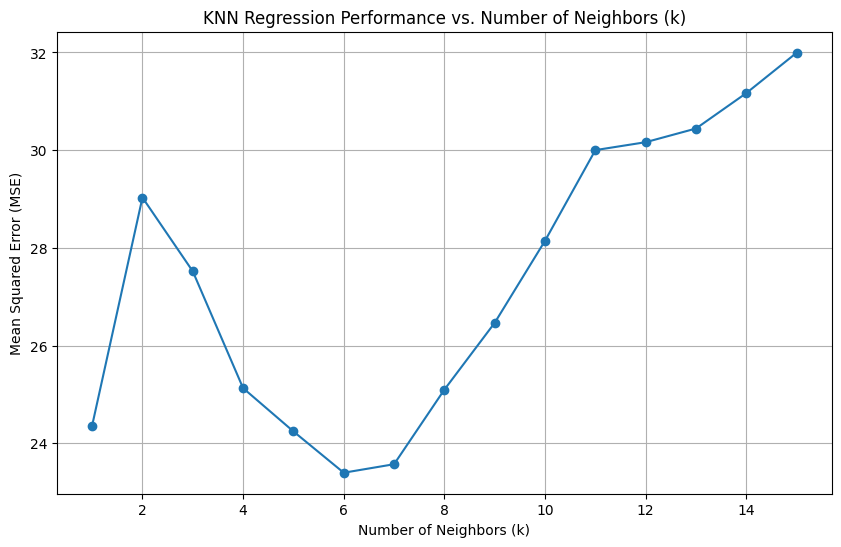

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), mse_knn_list, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('KNN Regression Performance vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

### Correlation Heatmap

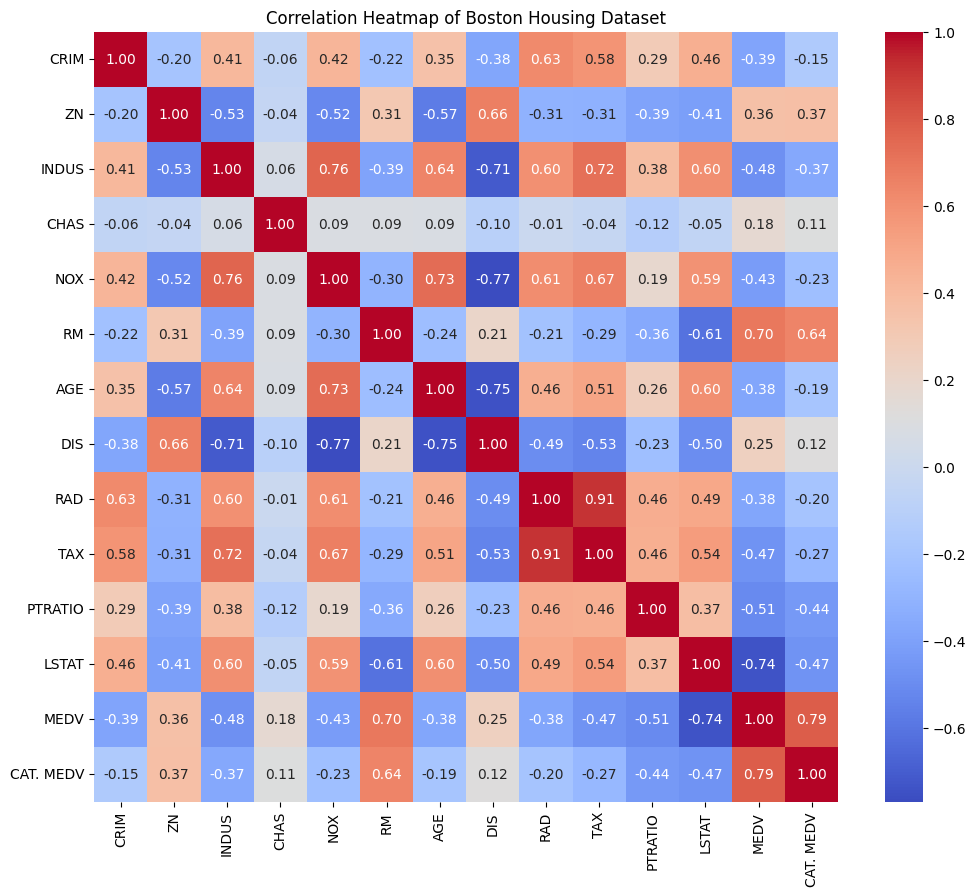

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

### Scatter Plot of Predicted vs. Actual Values (Linear Regression)

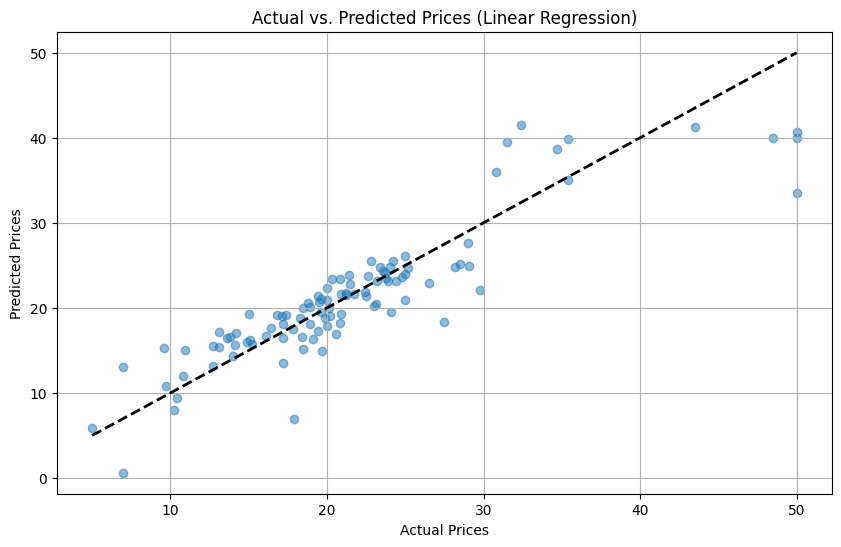

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

### Scatter Plot of Predicted vs. Actual Values (KNN Regression - Best k)

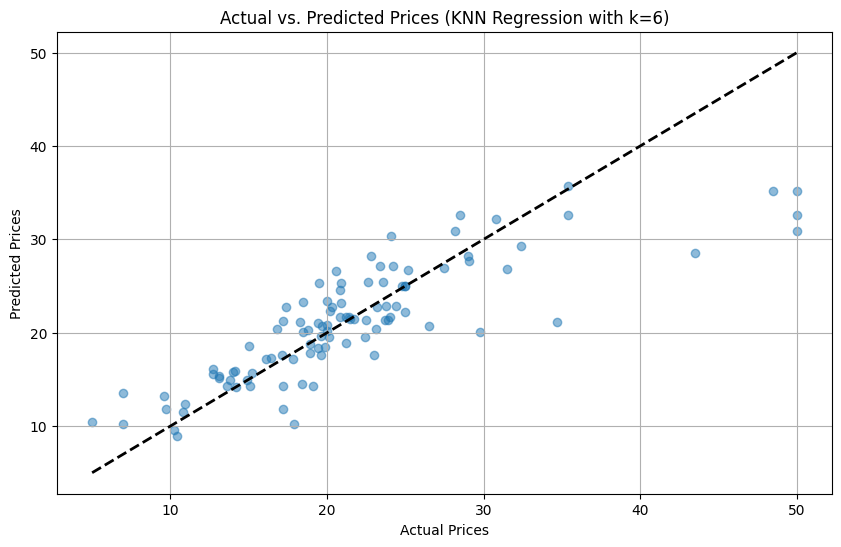

In [18]:
# Need to re-train KNN with the best k found previously (best_k)
min_mse_knn = min(mse_knn_list)
best_k = mse_knn_list.index(min_mse_knn) + 1
knn_model_best = KNeighborsRegressor(n_neighbors=best_k)
knn_model_best.fit(X_train, y_train)
y_pred_knn_best = knn_model_best.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn_best, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs. Predicted Prices (KNN Regression with k={best_k})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

## Compare MLR and KNN

Comparing the performance of MLR and the KNN model based on their MSE scores and to see which model performs better.


In [19]:
min_mse_knn = min(mse_knn_list)
best_k = mse_knn_list.index(min_mse_knn) + 1

print(f"Minimum MSE for KNN: {min_mse_knn:.4f} at k = {best_k}")
print(f"MSE for Linear Regression: {mse_lr:.4f}")

if min_mse_knn < mse_lr:
    print("KNN Regression performs better based on MSE.")
else:
    print("Linear Regression performs better based on MSE.")

Minimum MSE for KNN: 23.3970 at k = 6
MSE for Linear Regression: 14.8007
Linear Regression performs better based on MSE.


## Explanation

* Minimum MSE for KNN: 23.3970 at k = 6
* MSE for Linear Regression: 14.8007
* A lower MSE indicates that the model's predictions are closer to the actual values on average.
* Therefore, in terms of minimizing the prediction error on this test set, the Linear Regression model performed better than the best KNN model.